## Session 6 - Practical Data Science


### Exploratory Data Analysis

**1) Analyzing the Rows and Columns using pandas DataFrame**

**2) Variable types and Relationship between X and Y variables - Continuous and Discrete**

**3) Effect of various transformations on Data**

**4) Correlation between X and Y variables**

### 1) Analyzing the Rows and Columns using pandas DataFrame

The dataset we are going to use is the King County Housing data. Taken from Kaggle

In [74]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import spearmanr, pearsonr

%matplotlib inline


## Import the data

data = pd.read_csv(r"D:\Practical Data Science\Data\Housing Data\kc_house_data.csv", encoding = 'latin1')

## Number of rows and columns in the data
print("There are {} rows and {} columns in the DataFrame".format(len(data), len(data.columns)))
print(data.columns)

There are 21613 rows and 21 columns in the DataFrame
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')



### 2) Variable types and Relationship between X and Y variables - Continuous and Discrete

In [11]:
## Get the variable types from the dataframe
data.info()

## understand more about the Data statistics of individual variables
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Getting missing values & Plotting the relationship between X and y variables

In [78]:
## Check if any of the values are null

data.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

#### Correlation between variables

In [82]:
data['price'].corr(data['bedrooms'])

0.30834959814563834

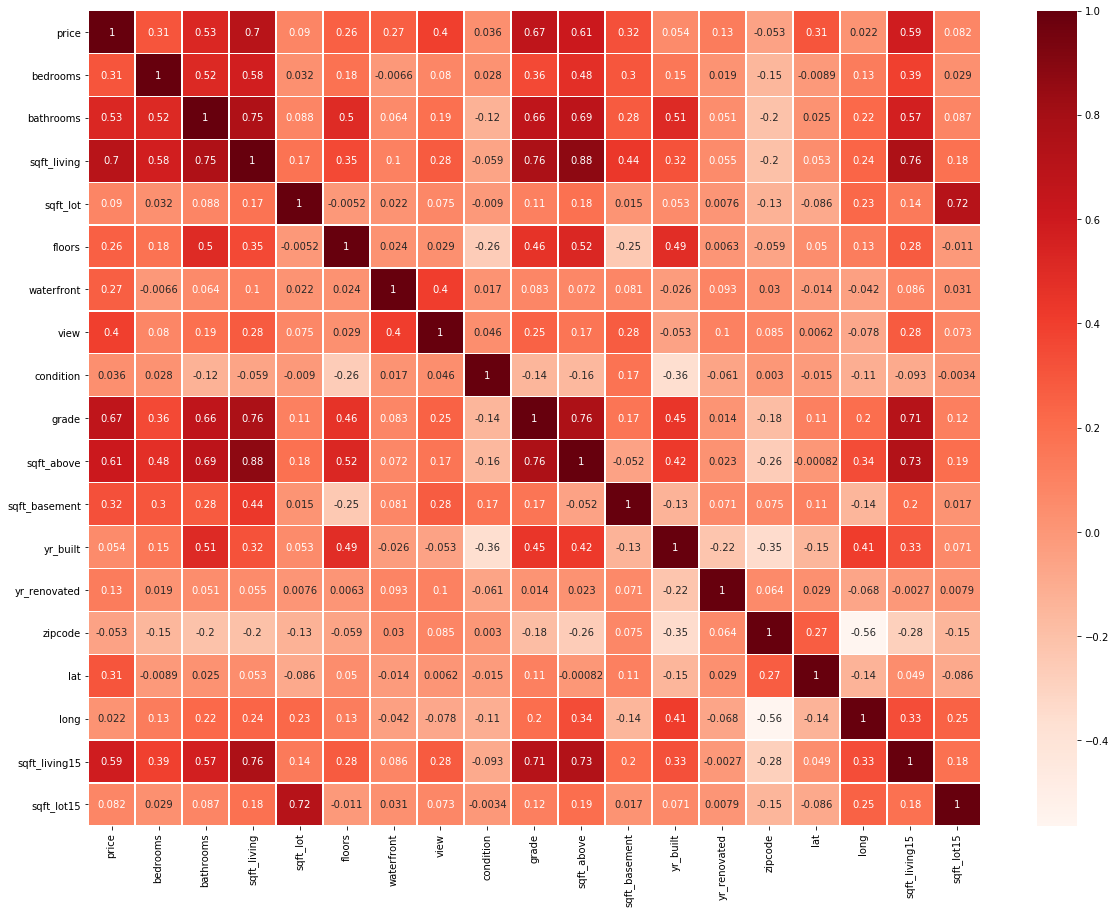

In [84]:
data.drop('id', axis=1, inplace=True)
corr = data.corr()
plt.figure(figsize = (20,15))
corr_matrix = sn.heatmap(corr, annot = True,linewidths = 0.3, cmap = "Reds")

### Exploring the Variable types and Relationship between X and Y variables

The Goodness of fit entirely depends on how well the predictors (**X**) are able to explain the variation in the dependent (**Y**) variable

Let us go through the examples of Good vs. Bad fit

In [53]:
import numpy as np

df = pd.DataFrame({"a":np.array([1, 2, 3, 4, 5]), "b":np.array([1,15, 12, 2, 9])})

#### Chi-Square correlation test between two Discrete variables

**Null hypothesis** - The events are independent

Reject null hypothesis is Chi-Square Statistic is significant, which means that the events are related

In [57]:
## Consider 4 rolls of a fair die

a1 = [6, 4, 5, 10]
a2 = [8, 5, 3, 3]
a3 = [5, 4, 8, 4]
a4 = [4, 11, 7, 13]
a5 = [5, 8, 7, 6]
a6 = [7, 3, 5, 9]

die_rolls = np.array([a1, a2, a3, a4, a5, a6])

## Chisquare statistic

stats.chi2_contingency(die_rolls)

(16.490612061288754,
 0.35021521809742745,
 15,
 array([[ 5.83333333,  5.83333333,  5.83333333,  7.5       ],
        [ 4.43333333,  4.43333333,  4.43333333,  5.7       ],
        [ 4.9       ,  4.9       ,  4.9       ,  6.3       ],
        [ 8.16666667,  8.16666667,  8.16666667, 10.5       ],
        [ 6.06666667,  6.06666667,  6.06666667,  7.8       ],
        [ 5.6       ,  5.6       ,  5.6       ,  7.2       ]]))

In [ ]:
stats

### Effect of transformations of data

#### Consider a case where there is no transformation

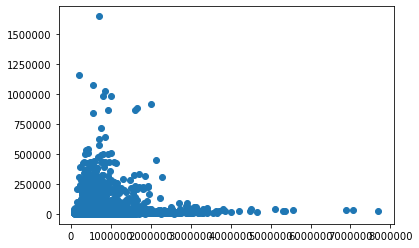

In [85]:
plt.scatter(data['price'], data['sqft_lot'])

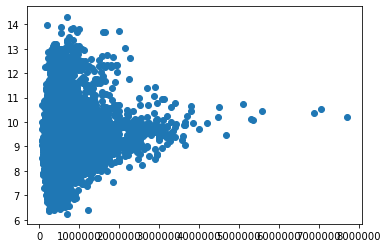

In [86]:
plt.scatter(data['price'], np.log(data['sqft_lot']))

In [90]:
np.log(data['price']).var()

0.27739658258884675

In [87]:
data.var().sort_values()

waterfront       7.485226e-03
lat              1.919990e-02
long             1.983262e-02
floors           2.915880e-01
condition        4.234665e-01
view             5.872426e-01
bathrooms        5.931513e-01
bedrooms         8.650150e-01
grade            1.381703e+00
yr_built         8.627973e+02
zipcode          2.862788e+03
yr_renovated     1.613462e+05
sqft_basement    1.958727e+05
sqft_living15    4.697612e+05
sqft_above       6.857347e+05
sqft_living      8.435337e+05
sqft_lot15       7.455182e+08
sqft_lot         1.715659e+09
price            1.347824e+11
dtype: float64

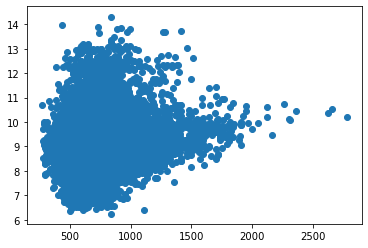

In [92]:
plt.scatter(np.sqrt(data['price']), np.log(data['sqft_lot']))

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

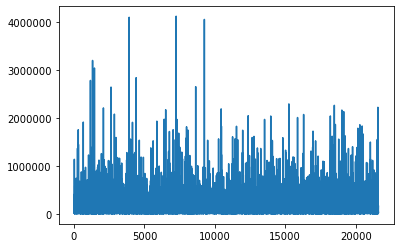

In [102]:
model = LinearRegression()

## Predictors
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above',
       'sqft_basement']]

y = data['price']

model.fit(X,y)

y_pred = model.predict(X)
y_pred[0:5]
plt.plot(abs(y-y_pred))

In [105]:
print(model.coef_)

[-5.99603456e+04  4.10998225e+03  2.15076760e+02 -3.49197563e-01
  1.13679729e+04  9.16589900e+01  1.23417771e+02]
